# Active-CLF showcase: 2D dummy dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import activeclf
from activeclf.utils.beauty import get_axes

## Input data

In [2]:
DATA_DIR = '../datasets/3d_ani_space/'
DATA_FILES = 'aniSpace3D_gmm_phases3.csv'

In [3]:
# data_3p, data_4p, data_5p = [activeclf.DataLoader(file_path=DATA_DIR+file, target='target') for file in DATA_FILES]

In [4]:
data = activeclf.DataLoader(file_path=DATA_DIR+DATA_FILES, target='target')

Loading DataFrame ../datasets/3d_ani_space/aniSpace3D_gmm_phases3.csv



### Data visualization

In [5]:
# access the dataframe as pd.Dataframe object

data.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
 2   z       2000 non-null   float64
 3   target  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB


In [6]:
# build the feature space

data.feature_space(scaling=True)

Feature space: ['x', 'y', 'z'],
Target property: target
Scaling the data (StandarScaler) ...


In [7]:
data.fspace_keys

['x', 'y', 'z']

In [8]:
data

In [9]:
import seaborn
from itertools import combinations
from typing import List

def get_pairs(input_list: List):
    # Generate all pairs of non-repeating elements
    pairs = list(combinations(input_list, 2))
    return pairs


def plot_dataset_2D(data: activeclf.datamanager.DataLoader):
    try:
        variables = data.fspace_keys
    except:
        print('The data needs to be featurized.')

    if len(variables) == 2:
        variables_pair_list = [variables]
        fig, ax = get_axes(len(variables_pair_list), 3)
        x,y = variables_pair_list[0][0], variables_pair_list[0][1]
        ax.scatter(
            data.X[x],
            data.X[y],
            c=data.y,
            cmap='viridis',
            edgecolor='0.'
        )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_xticks(())
        ax.set_yticks(())

    elif len(variables) > 2:
        variables_pair_list = get_pairs(input_list=variables)

        fig, ax = get_axes(len(variables_pair_list), 3)

        for i,(x,y) in enumerate(variables_pair_list):
            ax[i].scatter(
                data.X[x],
                data.X[y],
                c=data.y,
                cmap='viridis',
                edgecolor='0.'
            )
            ax[i].set_xlabel(x)
            ax[i].set_ylabel(y)
            ax[i].set_xticks(())
            ax[i].set_yticks(())

    elif len(variables) < 2:
        raise ValueError()
    
    return fig, ax


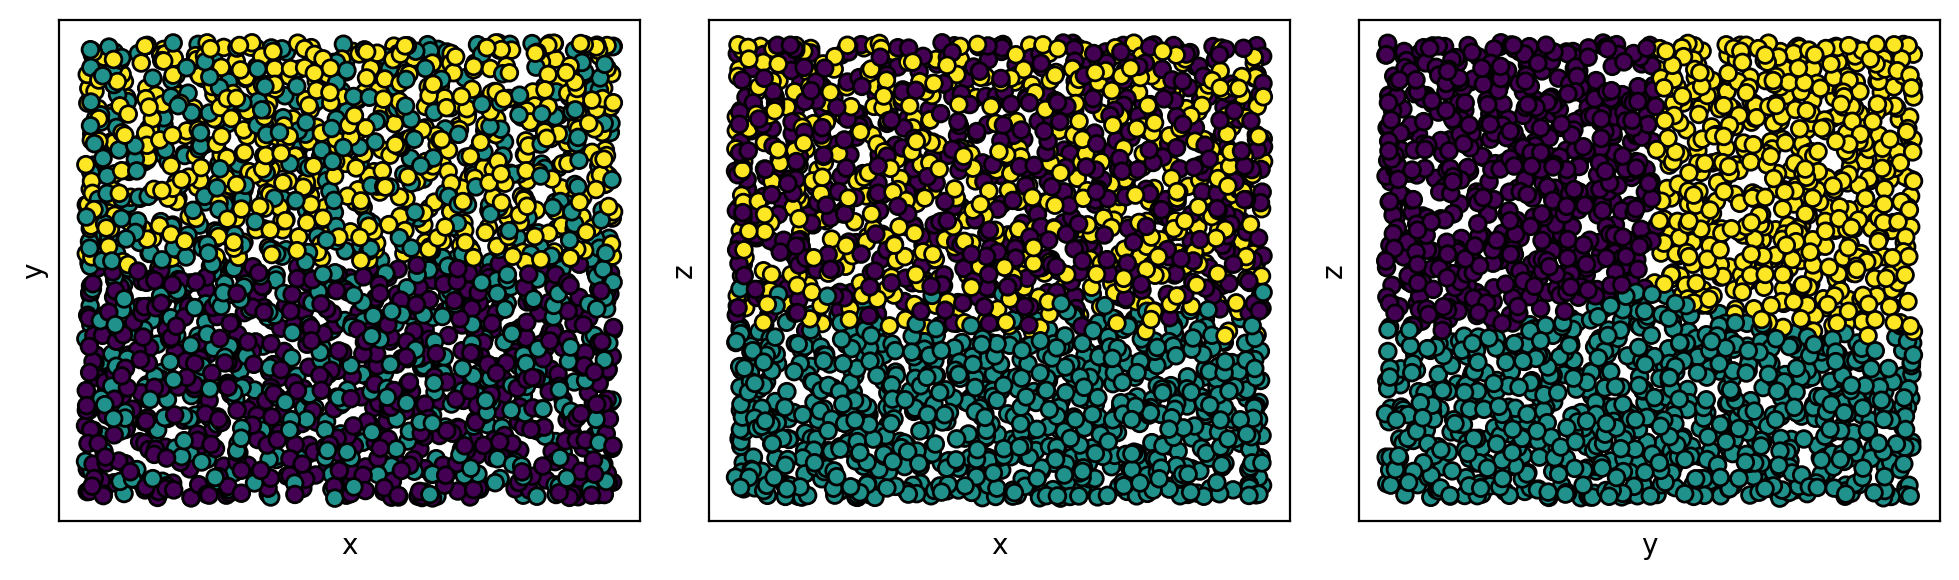

In [10]:
fig, ax = plot_dataset_2D(data=data)
fig.tight_layout()